<a href="https://colab.research.google.com/github/Mbids0411/ML/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Write a program to perform Binary Classification using IRIS dataset on 2 selected columns using perceptron algorithm.

In [ ]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


iris = load_iris()
X = iris.data[:, [0, 2]]  # Select 'sepal length' and 'petal length'
y = iris.target


binary_filter = y < 2  # Keep only classes 0 and 1
X = X[binary_filter]
y = y[binary_filter]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)


y_pred = perceptron.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 1.00

Confusion Matrix:
 [[17  0]
 [ 0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



2.	Write a program to perform multiclass Classification using IRIS dataset using multilayer perceptron algorithm.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal and petal dimensions
y = iris.target  # Targets: 0 (setosa), 1 (versicolor), 2 (virginica)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Standardize the features (important for MLPs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Create and train the Multilayer Perceptron model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(10, 10),  # Two hidden layers with 10 neurons each
    activation='relu',           # Activation function: ReLU
    solver='adam',               # Optimizer: Adam
    max_iter=500,                # Maximum iterations
    random_state=42
)

mlp_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = mlp_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", class_report)

# Step 6: Visualize the Confusion Matrix
print("Confusion Matrix (KNN Classification):")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Model Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Confusion Matrix (KNN Classification):
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


3.	Apply KNN classification algorithm on IRIS dataset.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data (KNN is sensitive to scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the inbuilt KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy with k={k}: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


KNN Accuracy with k=5: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



4.	Compute the Confusion matrix and other similarity parameters for classification algorithm mentioned in program 1 to 3.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming y_test (true labels) and y_pred (predicted labels) are obtained from Program 1
print("Confusion Matrix (Binary Classification):")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report (Binary Classification):")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Binary Classification): {accuracy:.2f}")

# Assuming y_test (true labels) and y_pred (predicted labels) are obtained from Program 3
print("Confusion Matrix (KNN Classification):")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report (KNN Classification):")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (KNN Classification): {accuracy:.2f}")


Confusion Matrix (Binary Classification):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report (Binary Classification):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy (Binary Classification): 1.00
Confusion Matrix (KNN Classification):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report (KNN Classification):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weight

5.	Write a program to perform K means clustering algorithm on the Kaggle based dataset .

    Feature1  Feature2  Cluster
0  -9.113944  6.813616        3
1  -9.354576  7.092790        3
2  -2.015671  8.281780        0
3  -7.010236 -6.220843        1
4 -10.061202  6.718671        3
Silhouette Score: 0.88


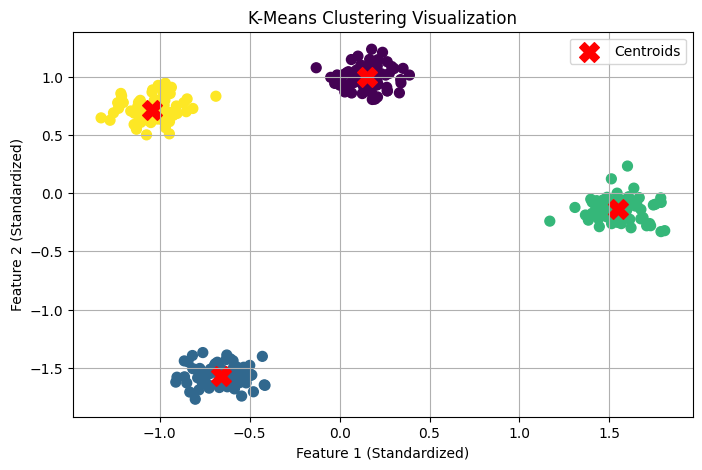

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Determine the optimal number of clusters
inertia = []
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Perform K-Means Clustering
optimal_clusters = 4  # Choose based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
df['Cluster'] = cluster_labels

# Display dataset with clusters
print(df.head())

# Evaluate clustering
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.grid(True)
plt.show()


5.	Write a program to perform K means clustering algorithm on the IRIS based dataset .

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Select two features for visualization (you can use all features for clustering)
#selected_features = ['sepal length (cm)', 'petal length (cm)']
#data = data[selected_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform K-Means Clustering
optimal_clusters = 3  # Based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['Cluster'] = cluster_labels

# Display the dataset with cluster labels
print(data.head())
print("\n\nCluster Centers (scaled):\n")
print(kmeans.cluster_centers_)
print("\n\nInertia (WCSS):", kmeans.inertia_)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  


Cluster Centers (scaled):

[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


Inertia (WCSS): 191.02473685317958


Using Kaggle


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the Kaggle-based dataset
# Replace 'your_dataset.csv' with the actual file name and ensure the file is uploaded in Colab
file_path = 'your_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
print(data.head())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

optimal_clusters = 3  # Replace this based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['Cluster'] = cluster_labels

# Display dataset with clusters
print("Clustered Dataset:")
print(data.head())




FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

Easy Code

In [ ]:
import pandas as pd  # Data manipulation
from sklearn.cluster import KMeans  # K-means algorithm
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.datasets import load_iris

# Step 2: Load the Dataset
iris=load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)  # Replace with your dataset path
print("Dataset loaded successfully.")

# Step 3: Preprocess the Data
# Select relevant columns for clustering (e.g., Annual Income and Spending Score)
X = df[0:2]  # Extract features for clustering

# Standardize the data to ensure equal weight for all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Transform the data into standardized values
print("Data preprocessing complete. Features scaled.")

# Step 4: Apply K-means Clustering with a Fixed Number of Clusters (e.g., 5)
kmeans = KMeans(n_clusters=2, random_state=42)  # Create a K-means model
kmeans.fit(X_scaled)  # Fit the model on the scaled data
print("K-means clustering complete.")

# Step 5: Analyze the Cluster Results
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)  # Display the coordinates of the cluster centroids in scaled form

print("\nCluster Labels for Each Data Point:")
print(kmeans.labels_)  # Display the cluster label assigned to each data point

print("\nInertia (WCSS):", kmeans.inertia_)  # Output the sum of squared distances to cluster centers

Dataset loaded successfully.
Data preprocessing complete. Features scaled.
K-means clustering complete.
Cluster Centers (scaled):
[[ 1.  1.  0.  0.]
 [-1. -1.  0.  0.]]

Cluster Labels for Each Data Point:
[0 1]

Inertia (WCSS): 0.0


6.	Apply decision tree algorithm to classify the data obtained through UCI repository.

Feature data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target labels:
0    50
1    50
2    50
Name: count, dtype: int64

Model Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



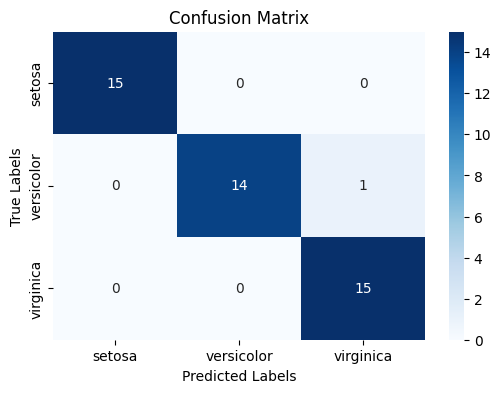

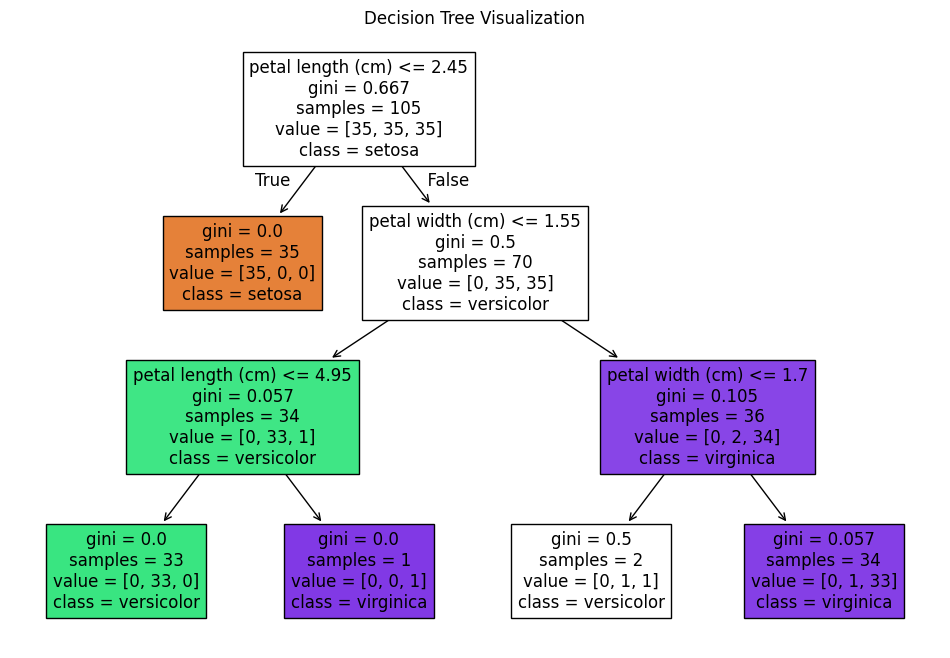

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

# Display dataset structure
print("Feature data:")
print(X.head())
print("\nTarget labels:")
print(pd.Series(y).value_counts())

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = dt_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)

# Step 6: Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree Visualization')
plt.show()


Easier code

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


iris = load_iris()


data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target


X = data.drop('target', axis=1)
y = data['target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix :")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 100.00%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset from UCI (e.g., 'iris' or another dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# Evaluate
accuracy = accuracy_score(y_pred, y_test)
print("Decision Tree Accuracy:", accuracy*100,'%')
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix :")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Decision Tree Accuracy: 100.0 %
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix :
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


7.	Apply simple linear regression algorithm on House price prediction dataset obtained through Kaggle.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate synthetic dataset
np.random.seed(42)  # For reproducibility
n_samples = 100

# Generate house sizes (in square feet) and prices (in dollars)
house_sizes = np.random.randint(500, 3500, size=n_samples)  # Square feet
house_prices = house_sizes * 120 + np.random.normal(0, 50000, size=n_samples)  # Add some noise

# Create a DataFrame
data = pd.DataFrame({'House Size (sqft)': house_sizes, 'House Price ($)': house_prices})
print("First 5 rows of the dataset:")
print(data.head())

# Step 3: Split the dataset into training and testing sets
X = data[['House Size (sqft)']]
y = data['House Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Apply Simple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Model parameters
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Model: Price = {slope:.2f} * Size + {intercept:.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

First 5 rows of the dataset:
   House Size (sqft)  House Price ($)
0               1360    192306.139736
1               1794    259667.422980
2               1630    240316.616505
3               1595    229149.889862
4               2138    246201.705495
Linear Regression Model: Price = 119.31 * Size + 1008.02
Mean Squared Error (MSE): 1977966082.00
R² Score: 0.83


Now using Kaggle


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Kaggle-based dataset
# Replace 'house_prices.csv' with your actual dataset file name
file_path = 'house_prices.csv'
data = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Select features for regression (update column names based on your dataset)
# For example: Predict 'Price' based on 'Area'
X = data[['Area']]  # Independent variable (e.g., house area in sq. ft.)
y = data['Price']   # Dependent variable (e.g., house price in $)

# Check for null values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")



FileNotFoundError: [Errno 2] No such file or directory: 'house_prices.csv'